In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


In [2]:
# -*- coding: utf-8 -*-
"""
Created on Sun Mar 24 23:07:16 2019

@author: JamesChiou
"""
import sys
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from network import NeuralNetwork, NeuronLayer


def binary_cross_entropy(predictions, targets):
    predictions = np.clip(predictions, 1e-12, 1. - 1e-12)
    if int(targets) == 1:
        ce = -np.log(predictions)
    else:
        ce = -np.log(1 - predictions)
    return ce


def one_hot_encode(targets, n_classes=2):
    targets = targets.reshape(-1)
    one_hot_targets = np.eye(n_classes)[int(targets)]
    return one_hot_targets


# load dataset
dataset = pd.read_csv('titanic.csv')
# dataset = (dataset - dataset.mean())/dataset.std()
# train test split
train = dataset.iloc[:800]
test = dataset.iloc[800:]
train = train.values
test = test.values

'''
good params
6-8-10-1, tanh, 300, 50, 0.01
'''
# set random seed
np.random.seed(600)
# build model
Net = NeuralNetwork()
Net.add_layer(NeuronLayer(input_num=6, output_num=8, activation='tanh',
                          input_layer=True))
Net.add_layer(NeuronLayer(input_num=8, output_num=10, activation='tanh'))
Net.add_layer(NeuronLayer(input_num=10, output_num=1, activation='sigmoid'))

epoch_num = 500
batch_size = 50
lr = 0.005
track_ce = []
train_acc = []
test_acc = []
track_valid = []

# train
best_Net = None
best_test_loss = 1e10
for i in range(0, epoch_num):
    mse_loss = 0
    ce_loss = 0
    train_error = 0
    test_error = 0
    shuffle_train = np.random.permutation(train)
    for (j, data) in enumerate(shuffle_train, start=1):
        inputs = data[1:]
        # outputs = one_hot_encode(data[0])
        outputs = [data[0]]
        net_outs = Net.forward(inputs)
        net_outs = np.array(net_outs, ndmin=1)
        if (net_outs[0] < 0.5) and int(outputs[0]) > 0.5:
            train_error += 1
        elif (net_outs[0] > 0.5) and int(outputs[0]) < 0.5:
            train_error += 1
        Net.backward(outputs)
        if j % batch_size == 0:
            Net.update_weights(lr)

        # compute error
        for o, no in zip(outputs, net_outs):
            ce_loss += binary_cross_entropy(no, o)

    ce_loss /= len(shuffle_train)
    track_ce.append(ce_loss)
    train_acc.append(train_error/len(shuffle_train))

    # test (validation)
    test_loss = 0
    for data in test:
        inputs = data[1:]
        # outputs = one_hot_encode(data[0])
        outputs = [data[0]]
        net_outs = Net.forward(inputs)
        net_outs = np.array(net_outs, ndmin=1)
        if (net_outs[0] < 0.5) and int(outputs[0]) > 0.5:
            test_error += 1
        elif (net_outs[0] > 0.5) and int(outputs[0]) < 0.5:
            test_error += 1
        # compute error
        for o, no in zip(outputs, net_outs):
            test_loss += binary_cross_entropy(no, o)

    test_loss /= len(test)
    track_valid.append(test_error)
    test_acc.append(test_error/len(test))
    if test_loss < best_test_loss:
        best_test_loss = test_loss
        best_Net = copy.deepcopy(Net)

    sys.stdout.write('\r' + '{:3d}'.format(i) +
                     '\tloss={:.5f}'.format(ce_loss))

print()
print(best_test_loss)
plt.plot(track_ce)
plt.show()

plt.plot(train_acc)
plt.plot(test_acc)
plt.show()


 49	loss=0.63889

KeyboardInterrupt: 

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Sun Mar 24 23:07:16 2019

@author: JamesChiou
"""
import sys
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from network import NeuralNetwork, NeuronLayer


def binary_cross_entropy(predictions, targets):
    predictions = np.clip(predictions, 1e-12, 1. - 1e-12)
    if int(targets) == 1:
        ce = -np.log(predictions)
    else:
        ce = -np.log(1 - predictions)
    return ce


def one_hot_encode(targets, n_classes=2):
    targets = targets.reshape(-1)
    one_hot_targets = np.eye(n_classes)[int(targets)]
    return one_hot_targets


# load dataset
dataset = pd.read_csv('titanic.csv')
# dataset = (dataset - dataset.mean())/dataset.std()
# train test split
train = dataset.iloc[:800]
test = dataset.iloc[800:]
train = train.values
test = test.values

'''
good params
6-8-10-1, tanh, 300, 50, 0.01
'''
# set random seed
np.random.seed(600)
# build model
Net = NeuralNetwork()
Net.add_layer(NeuronLayer(input_num=6, output_num=8, activation='tanh',
                          input_layer=True))
Net.add_layer(NeuronLayer(input_num=8, output_num=10, activation='tanh'))
Net.add_layer(NeuronLayer(input_num=10, output_num=1, activation='sigmoid'))

epoch_num = 500
batch_size = 50
lr = 0.005
track_ce = []
train_acc = []
test_acc = []
track_valid = []

# train
best_Net = None
best_test_loss = 1e10
for i in range(0, epoch_num):
    mse_loss = 0
    ce_loss = 0
    train_error = 0
    test_error = 0
    shuffle_train = np.random.permutation(train)
    for (j, data) in enumerate(shuffle_train, start=1):
        inputs = data[1:]
        # outputs = one_hot_encode(data[0])
        outputs = [data[0]]
        net_outs = Net.forward(inputs)
        net_outs = np.array(net_outs, ndmin=1)
        if (net_outs[0] < 0.5) and int(outputs[0]) > 0.5:
            train_error += 1
        elif (net_outs[0] > 0.5) and int(outputs[0]) < 0.5:
            train_error += 1
        Net.backward(outputs)
        if j % batch_size == 0:
            Net.update_weights(lr)

        # compute error
        for o, no in zip(outputs, net_outs):
            ce_loss += binary_cross_entropy(no, o)

    ce_loss /= len(shuffle_train)
    track_ce.append(ce_loss)
    train_acc.append(train_error/len(shuffle_train))

    # test (validation)
    test_loss = 0
    for data in test:
        inputs = data[1:]
        # outputs = one_hot_encode(data[0])
        outputs = [data[0]]
        net_outs = Net.forward(inputs)
        net_outs = np.array(net_outs, ndmin=1)
        if (net_outs[0] < 0.5) and int(outputs[0]) > 0.5:
            test_error += 1
        elif (net_outs[0] > 0.5) and int(outputs[0]) < 0.5:
            test_error += 1
        # compute error
        for o, no in zip(outputs, net_outs):
            test_loss += binary_cross_entropy(no, o)

    test_loss /= len(test)
    track_valid.append(test_error)
    test_acc.append(test_error/len(test))
    if test_loss < best_test_loss:
        best_test_loss = test_loss
        best_Net = copy.deepcopy(Net)

    sys.stdout.write('\r' + '{:3d}'.format(i) +
                     '\tloss={:.5f}'.format(ce_loss))

print()
print(best_test_loss)
plt.plot(track_ce)
plt.show()

plt.plot(train_acc)
plt.plot(test_acc)
plt.show()


  3	loss=0.67275

KeyboardInterrupt: 

499	loss=0.55649
0.5131404122707112


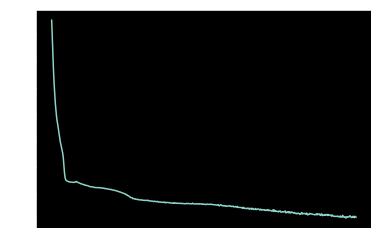

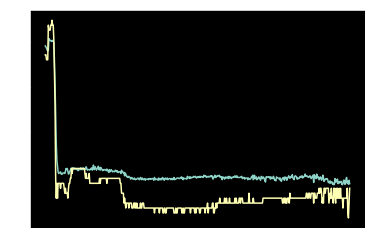

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Mar 24 23:07:16 2019

@author: JamesChiou
"""
import sys
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from network import NeuralNetwork, NeuronLayer


def binary_cross_entropy(predictions, targets):
    predictions = np.clip(predictions, 1e-12, 1. - 1e-12)
    if int(targets) == 1:
        ce = -np.log(predictions)
    else:
        ce = -np.log(1 - predictions)
    return ce


def one_hot_encode(targets, n_classes=2):
    targets = targets.reshape(-1)
    one_hot_targets = np.eye(n_classes)[int(targets)]
    return one_hot_targets


# load dataset
dataset = pd.read_csv('titanic.csv')
# dataset = (dataset - dataset.mean())/dataset.std()
# train test split
train = dataset.iloc[:800]
test = dataset.iloc[800:]
train = train.values
test = test.values

'''
good params
6-8-10-1, tanh, 300, 50, 0.01
'''
# set random seed
np.random.seed(1000)
# build model
Net = NeuralNetwork()
Net.add_layer(NeuronLayer(input_num=6, output_num=8, activation='tanh',
                          input_layer=True))
Net.add_layer(NeuronLayer(input_num=8, output_num=10, activation='tanh'))
Net.add_layer(NeuronLayer(input_num=10, output_num=1, activation='sigmoid'))

epoch_num = 500
batch_size = 50
lr = 0.005
track_ce = []
train_acc = []
test_acc = []
track_valid = []

# train
best_Net = None
best_test_loss = 1e10
for i in range(0, epoch_num):
    mse_loss = 0
    ce_loss = 0
    train_error = 0
    test_error = 0
    shuffle_train = np.random.permutation(train)
    for (j, data) in enumerate(shuffle_train, start=1):
        inputs = data[1:]
        # outputs = one_hot_encode(data[0])
        outputs = [data[0]]
        net_outs = Net.forward(inputs)
        net_outs = np.array(net_outs, ndmin=1)
        if (net_outs[0] < 0.5) and int(outputs[0]) > 0.5:
            train_error += 1
        elif (net_outs[0] > 0.5) and int(outputs[0]) < 0.5:
            train_error += 1
        Net.backward(outputs)
        if j % batch_size == 0:
            Net.update_weights(lr)

        # compute error
        for o, no in zip(outputs, net_outs):
            ce_loss += binary_cross_entropy(no, o)

    ce_loss /= len(shuffle_train)
    track_ce.append(ce_loss)
    train_acc.append(train_error/len(shuffle_train))

    # test (validation)
    test_loss = 0
    for data in test:
        inputs = data[1:]
        # outputs = one_hot_encode(data[0])
        outputs = [data[0]]
        net_outs = Net.forward(inputs)
        net_outs = np.array(net_outs, ndmin=1)
        if (net_outs[0] < 0.5) and int(outputs[0]) > 0.5:
            test_error += 1
        elif (net_outs[0] > 0.5) and int(outputs[0]) < 0.5:
            test_error += 1
        # compute error
        for o, no in zip(outputs, net_outs):
            test_loss += binary_cross_entropy(no, o)

    test_loss /= len(test)
    track_valid.append(test_error)
    test_acc.append(test_error/len(test))
    if test_loss < best_test_loss:
        best_test_loss = test_loss
        best_Net = copy.deepcopy(Net)

    sys.stdout.write('\r' + '{:3d}'.format(i) +
                     '\tloss={:.5f}'.format(ce_loss))

print()
print(best_test_loss)
plt.plot(track_ce)
plt.show()

plt.plot(train_acc)
plt.plot(test_acc)
plt.show()
